In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/socail/social.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/socail/social.csv')
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,Not Purchased
1,15810944,Male,35,20000,Not Purchased
2,15668575,Female,26,43000,Not Purchased
3,15603246,Female,27,57000,Not Purchased
4,15804002,Male,19,76000,Not Purchased


In [4]:
data = {
    'Age' : ['19','35','26','27','19'],
    'EstimatedSalary' : ['19000','20000','43000','57000','76000']}
df = pd.DataFrame(data)
df.drop(['Age','EstimatedSalary'],axis=1)

""
0
1
2
3
4


In [5]:
print(df.head())

  Age EstimatedSalary
0  19           19000
1  35           20000
2  26           43000
3  27           57000
4  19           76000


In [6]:
x = np.array([19,35,26,27,19])
y = np.array([19000,20000,43000,57000,76000])

In [7]:
#x = df.values[:, :1]
#y = df.values[:, 1:2]

Text(0.5, 0, 'Estimated_Salary')

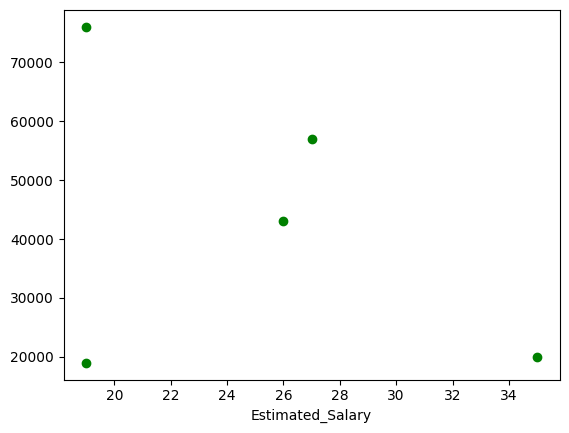

In [8]:
plt.scatter(x,y,color = 'g')
plt.xlabel('Age')
plt.xlabel('Estimated_Salary')

In [9]:
x = x.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2,random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lr.predict(x_test))
print(score)

-0.5710955710955712


Text(0, 0.5, 'Estimated_Salary')

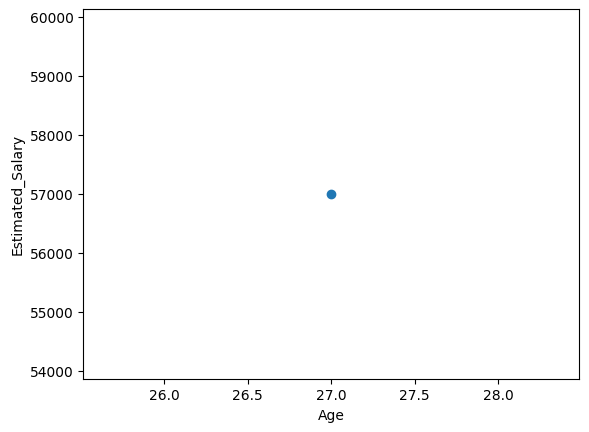

In [13]:
plt.plot(x_train,lr.predict(x_train),color = 'b')
plt.scatter(x_train,y_train)
plt.xlabel("Age")
plt.ylabel("Estimated_Salary")

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree = 100,include_bias = True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [16]:
x_train_poly

array([[1.00000000e+000, 2.70000000e+001, 7.29000000e+002,
        1.96830000e+004, 5.31441000e+005, 1.43489070e+007,
        3.87420489e+008, 1.04603532e+010, 2.82429536e+011,
        7.62559748e+012, 2.05891132e+014, 5.55906057e+015,
        1.50094635e+017, 4.05255515e+018, 1.09418989e+020,
        2.95431271e+021, 7.97664431e+022, 2.15369396e+024,
        5.81497370e+025, 1.57004290e+027, 4.23911583e+028,
        1.14456127e+030, 3.09031544e+031, 8.34385168e+032,
        2.25283995e+034, 6.08266788e+035, 1.64232033e+037,
        4.43426488e+038, 1.19725152e+040, 3.23257910e+041,
        8.72796357e+042, 2.35655016e+044, 6.36268544e+045,
        1.71792507e+047, 4.63839769e+048, 1.25236738e+050,
        3.38139191e+051, 9.12975817e+052, 2.46503470e+054,
        6.65559370e+055, 1.79701030e+057, 4.85192781e+058,
        1.31002051e+060, 3.53705537e+061, 9.55004951e+062,
        2.57851337e+064, 6.96198609e+065, 1.87973624e+067,
        5.07528786e+068, 1.37032772e+070, 3.69988485e+07

In [17]:
x_test_poly

array([[1.00000000e+000, 3.50000000e+001, 1.22500000e+003,
        4.28750000e+004, 1.50062500e+006, 5.25218750e+007,
        1.83826562e+009, 6.43392969e+010, 2.25187539e+012,
        7.88156387e+013, 2.75854735e+015, 9.65491574e+016,
        3.37922051e+018, 1.18272718e+020, 4.13954512e+021,
        1.44884079e+023, 5.07094277e+024, 1.77482997e+026,
        6.21190490e+027, 2.17416671e+029, 7.60958350e+030,
        2.66335423e+032, 9.32173979e+033, 3.26260893e+035,
        1.14191312e+037, 3.99669593e+038, 1.39884358e+040,
        4.89595252e+041, 1.71358338e+043, 5.99754184e+044,
        2.09913964e+046, 7.34698875e+047, 2.57144606e+049,
        9.00006122e+050, 3.15002143e+052, 1.10250750e+054,
        3.85877625e+055, 1.35057169e+057, 4.72700090e+058,
        1.65445032e+060, 5.79057611e+061, 2.02670164e+063,
        7.09345573e+064, 2.48270951e+066, 8.68948327e+067,
        3.04131914e+069, 1.06446170e+071, 3.72561595e+072,
        1.30396558e+074, 4.56387954e+075, 1.59735784e+07

In [18]:
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(x_train_poly,y_train)
y_pred = reg.predict(x_test_poly)
score = r2_score(y_test,y_pred)
print(score)

-0.5710955710955712


In [19]:
print(reg.coef_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [20]:
print(reg.intercept_)

57000.0


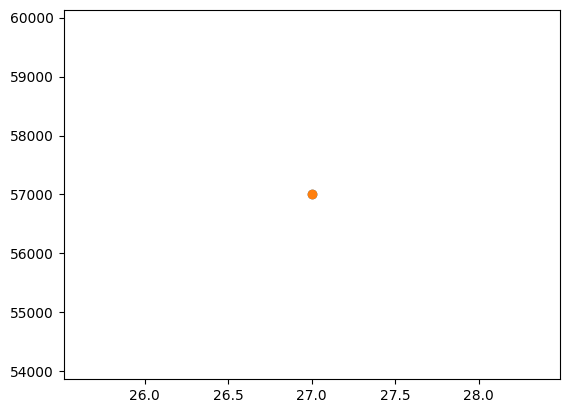

In [21]:
plt.scatter(x_train,reg.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [22]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00, ...,
         5.72641690e+46, -1.71792507e+47,  5.15377521e+47],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00, ...,
         2.12800007e+46, -6.31983941e+46,  1.87689703e+47],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00, ...,
         7.82840684e+45, -2.30131558e+46,  6.76517394e+46],
       ...,
       [ 1.00000000e+00,  2.93969849e+00,  8.64182723e+00, ...,
         7.82840684e+45,  2.30131558e+46,  6.76517394e+46],
       [ 1.00000000e+00,  2.96984925e+00,  8.82000455e+00, ...,
         2.12800007e+46,  6.31983941e+46,  1.87689703e+47],
       [ 1.00000000e+00,  3.00000000e+00,  9.00000000e+00, ...,
         5.72641690e+46,  1.71792507e+47,  5.15377521e+47]])

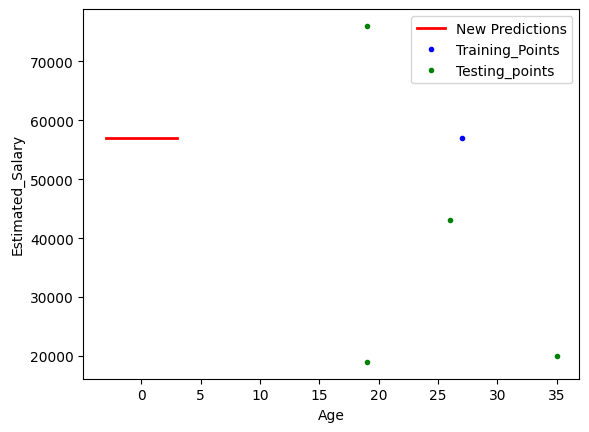

In [23]:
y_new = reg.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",linewidth = 2,label = "New Predictions")
plt.plot(x_train,y_train,"b.",label = 'Training_Points')
plt.plot(x_test,y_test,"g.",label = 'Testing_points')
plt.xlabel("Age")
plt.ylabel("Estimated_Salary")
plt.legend()
plt.show()